In [1]:
## Python 3.7 over, awkward1, numpy !

import awkward1 as ak
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager
import mplhep as hep

In [2]:
def Reader(directory,tuplelist,variable): ##(arr_like, arr_like, str)
    count = 0
    outputlist = []
    for f in tuplelist:
        outputlist.append(np.load(""+ directory +"/"+ str(f) +"_nTuple.npy",allow_pickle=True)[()][''+ variable +''])
        count+=1
    return outputlist

In [3]:
def Normalizer(DATASET,XSECSET,GENEVTSET):
    if len(DATASET) != len(XSECSET) or len(DATASET) != len(GENEVTSET):
        print("ERROR -> list size not matched!")
        return -1
    
    Normed_SET = []
    Lumi = 3000000
    for i in range(len(DATASET)):
        Normed_SET.append(float(XSECSET[i]) * Lumi / float(GENEVTSET[i]))
    return Normed_SET

In [4]:
def Normalizer_for_plotting(DATASET,XSECSET,GENEVTSET):
    if len(DATASET) != len(XSECSET) or len(DATASET) != len(GENEVTSET):
        print("ERROR -> list size not matched!")
        return -1
    
    Normed_SET = []
    Lumi = 3000000
    for i in range(len(DATASET)):
        Normed_SET.append(ak.ones_like(DATASET[i]) * float(XSECSET[i]) * Lumi / float(GENEVTSET[i]))
    return Normed_SET

In [5]:
def Optimizer_1d(var,weightlist):
    _x = []
    _s = []
    bkg = 0
    sig = 0
    eff = 0
    for i in range(50,1000,10):
        tar_var = var[f]
        mask = tar_var > i
        tar_var = tar_var[mask]
        bkg = bkg + (len(tar_var) * weightlist[f])
        sig = len(tar_var1) * weightlist[f]
        
    sigma = sig / np.sqrt(bkg)
    _x.append(i)
    _s.append(sigma)
    for n in range(len(_s)):
        if _s[n] == max(_s):
            print("Optimized over",_x[n],"Significance",_s[n])
            break
    return _x,_s

In [6]:
def Optimizer_2d(var1,var2,weightlist):
    _x = []
    _y = []
    _s = []
    for i in range(50,1000,10):
        bkg = 0
        sig = 0
        eff = 0
        for j in range(100,1000,50):
            bkg = 0
            sig = 0
            eff = 0
            for f in range(len(var1)):
                tar_var1 = var1[f]
                tar_var2 = var2[f]
                mask = (tar_var1 > i) & (tar_var2 > j)
                tar_var1 = tar_var1[mask]
                bkg = bkg + (len(tar_var1) * weightlist[f])
                sig = len(tar_var1) * weightlist[f]
            
            sigma = sig / np.sqrt(bkg)
            
            _x.append(i)
            _y.append(j)
            _s.append(sigma)
        for n in range(len(_s)):
            if _s[n] == max(_s):
                print("Now optimization",_x[n],_y[n],"Significance",_s[n])
                break
    return _x,_y,_s

In [7]:
## Define your filepath, target tuples and physical variable

## Target directory
filepath = "./NTuples"

## Target variable
variable = "MET"

## Target samples
tuplelist = [
    "TT_had", # 0
    "TT_semi", # 1
    "TTW", # 2
    "TTZ", # 3
    "WQ", #4
    "WL", #5
    "ZQ", #6
    "ZL", #7
    "DY", #8
    "WW", #9
    "WZ", # 10
    "ZZ", # 11
    "ST_t", # 12
    "ST_s", # 13

    "50to100", #14
    "100to200", #15
    "200to300", #16
    "300to500", #17
    "500to700", #18
    "700to1000", #19
    "1000to1500", #20
    "1500to2000", #21
    "2000toinf", #22
    "Signal" # 23
]

## Cross-section of each sample over Nevents
xseclist = [
    "210.5",
    "211.1",
    "1.13179",
    "0.88495",
    "277626",
    "34964.5",
    "94390.8",
    "8908.58",
    "13937.5",
    "78.09",
    "68.399",
    "15.909",
    "856.0",
    "67.69",
    
    "8.35e+08",
    "1.64e+08",
    "1.48e+07",
    "3.68e+06",
    "4.03e+05",
    "9.39e+04",
    "1.78e+04",
    "1.84e+03",
    "391.424",
    "0.0002463" ### CONFIDENTIAL ###
]

## Total generated events
Neventlist = [
    "1500000",
    "1776547",
    "1000000",
    "1000000",
    "975380",
    "295756",
    "963660",
    "774082",
    "999449",
    "1000000",
    "751367",
    "999999",
    "1000000",
    "1000000",
    
    "879936",
    "664371",
    "663402",
    "651072",
    "682683",
    "770213",
    "696671",
    "897009",
    "974531",
    "100000"
]

In [8]:
## Call your Reading Function
MET = Reader(filepath,tuplelist,"MET")
HT = Reader(filepath,tuplelist,"HT")
print(len(MET),len(xseclist),len(Neventlist))

24 24 24


In [9]:
SEL = 0
GEN = 0
for i in range(0,23,1):
    SEL = SEL + len(MET[i])
    GEN = GEN + int(Neventlist[i])
print(SEL)
print(GEN)

137257
20916128


In [10]:
SEL = 0
GEN = 0
for i in range(0,23,1):
    SEL = SEL + len(MET[i])
    GEN = GEN + int(Neventlist[i])
print(SEL)
print(GEN)

print("FPR = ",SEL/GEN)
print("TPR = ",len(MET[23])/100000)

137257
20916128
FPR =  0.00656225664711939
TPR =  0.14149


In [11]:
FINAL_EVT = 0
GEN = 0
for i in range(0,23,1):
    MASK = (MET[i] > 430) & (HT[i] > 650)
    GEN = GEN + int(Neventlist[i])
    FINAL_EVT = FINAL_EVT + len(MET[i][MASK])

print(FINAL_EVT)
print(GEN)

print(SEL/GEN)
SIGNAL_MASK = (MET[23] > 430) & (HT[23] > 650)
print(len(MET[23][SIGNAL_MASK])/100000)

1387
20916128
0.00656225664711939
0.00865


In [12]:
## Set Normalize term
Weightlist = Normalizer(tuplelist,xseclist,Neventlist)
print(Weightlist)

[421.0, 356.47804420597936, 3.39537, 2.65485, 853901.0436957903, 354662.28918432764, 293850.94327874976, 34525.72208112319, 41835.551388815235, 234.27, 273.09823295406903, 47.727047727047726, 2568.0, 203.07, 2846797948.941741, 740550084.2149943, 66927745.16808813, 16956649.955765262, 1770953.7222986363, 365742.9827852815, 76650.24093151574, 6153.7844101898645, 1204.9611556738575, 0.007389000000000001]


In [13]:
NORM = Optimizer_2d(MET,HT,Weightlist)

Now optimization 50 950 Significance 0.002076257352409376
Now optimization 50 950 Significance 0.002076257352409376
Now optimization 50 950 Significance 0.002076257352409376
Now optimization 50 950 Significance 0.002076257352409376
Now optimization 50 950 Significance 0.002076257352409376
Now optimization 50 950 Significance 0.002076257352409376
Now optimization 50 950 Significance 0.002076257352409376
Now optimization 50 950 Significance 0.002076257352409376
Now optimization 50 950 Significance 0.002076257352409376
Now optimization 50 950 Significance 0.002076257352409376
Now optimization 50 950 Significance 0.002076257352409376
Now optimization 50 950 Significance 0.002076257352409376
Now optimization 50 950 Significance 0.002076257352409376
Now optimization 50 950 Significance 0.002076257352409376
Now optimization 50 950 Significance 0.002076257352409376
Now optimization 50 950 Significance 0.002076257352409376
Now optimization 50 950 Significance 0.002076257352409376
Now optimizati

In [14]:
df = {
    'MET' : NORM[0],
    'HT' : NORM[1],
    'SIG' : NORM[2]
}

In [15]:
import pandas as pd
data = pd.DataFrame(df)
data = data.pivot('MET','HT','SIG')

print(data)

HT        100       150       200       250       300       350       400  \
MET                                                                         
50   0.000908  0.000908  0.000908  0.000908  0.000908  0.000908  0.000911   
60   0.000899  0.000899  0.000899  0.000899  0.000899  0.000899  0.000902   
70   0.000892  0.000892  0.000892  0.000892  0.000892  0.000892  0.000897   
80   0.000916  0.000916  0.000916  0.000916  0.000916  0.000916  0.000916   
90   0.000913  0.000913  0.000913  0.000913  0.000913  0.000913  0.000913   
..        ...       ...       ...       ...       ...       ...       ...   
950  0.000455  0.000455  0.000455  0.000455  0.000455  0.000455  0.000455   
960  0.000491  0.000491  0.000491  0.000491  0.000491  0.000491  0.000491   
970  0.000449  0.000449  0.000449  0.000449  0.000449  0.000449  0.000449   
980  0.000385  0.000385  0.000385  0.000385  0.000385  0.000385  0.000385   
990  0.000336  0.000336  0.000336  0.000336  0.000336  0.000336  0.000336   

<ipython-input-16-10f59afad90a>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(data.columns,data.index,data)


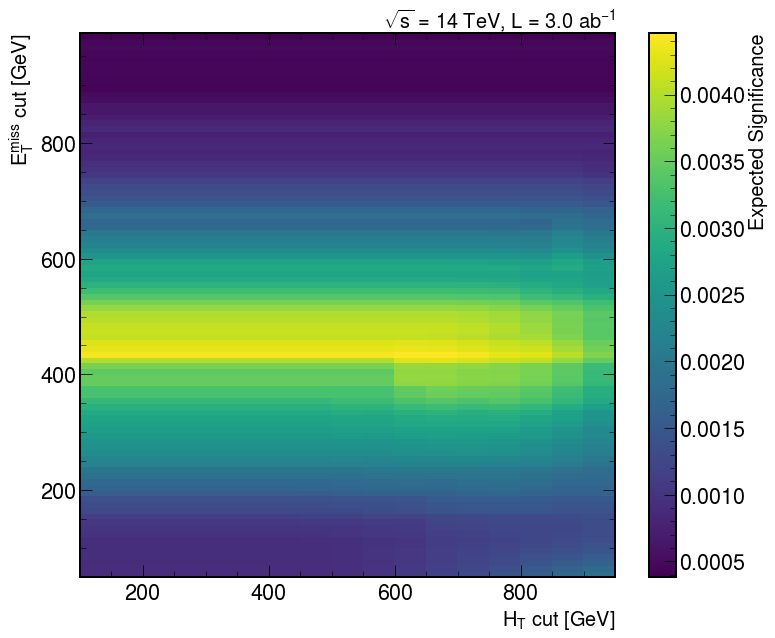

In [16]:
plt.style.use(hep.style.ROOT)
plt.rcParams["figure.figsize"] = (12,10)
plt.pcolor(data.columns,data.index,data)
cl = plt.colorbar()
cl.set_label("Expected Significance",fontsize=20)
plt.title("$\sqrt{s}$ = 14 TeV, L = 3.0 ab$^{-1}$", loc='right',fontsize=20)
#plt.xlabel("$m$$_{jj}$ cut [GeV]", fontsize=20)
plt.xlabel("$H$$_{T}$ cut [GeV]", fontsize=20)
plt.ylabel("$E$$^{miss}_{T}$ cut [GeV]", fontsize=20)
plt.show()

In [17]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
import matplotlib.cm as cm

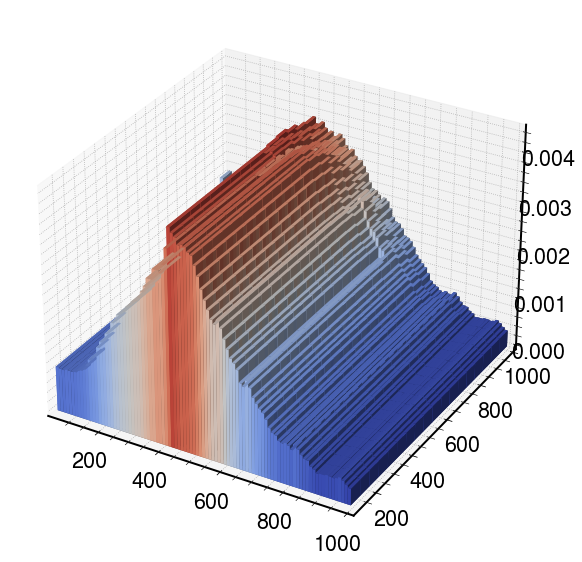

In [18]:
z3 = np.zeros(len(NORM[2]))
dx = np.ones(len(NORM[0]))*10
dy = np.ones(len(NORM[1]))*50

max_height = np.max(NORM[2])   # get range of colorbars
min_height = np.min(NORM[2])
cmap = cm.get_cmap('coolwarm')
rgba = [cmap((k-min_height)/max_height) for k in NORM[2]]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#ax.set_xlabel('MET')
#ax.set_ylabel('HT')
#ax.set_zlabel('Energy')
ax.set_xlim3d(50,1000)
ax.set_ylim3d(100,1000)
ax.bar3d(NORM[0],NORM[1],z3,dx,dy,NORM[2],color=rgba,norm=LogNorm(vmin=0.0001, vmax=0.01),shade=True,)


Float64Index([ 10.0,  30.0,  50.0,  70.0,  90.0, 110.0, 130.0, 150.0, 170.0,
              190.0, 210.0, 230.0, 250.0, 270.0, 290.0, 310.0, 330.0, 350.0,
              370.0, 390.0, 410.0, 430.0, 450.0, 470.0, 490.0, 510.0, 530.0,
              550.0, 570.0, 590.0, 610.0, 630.0, 650.0, 670.0, 690.0, 710.0,
              730.0],
             dtype='float64', name='dy')


<ipython-input-19-42a83cb4bc6c>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(df.columns,df.index,df,cmap='coolwarm',norm=LogNorm(vmin=0.05, vmax=10))


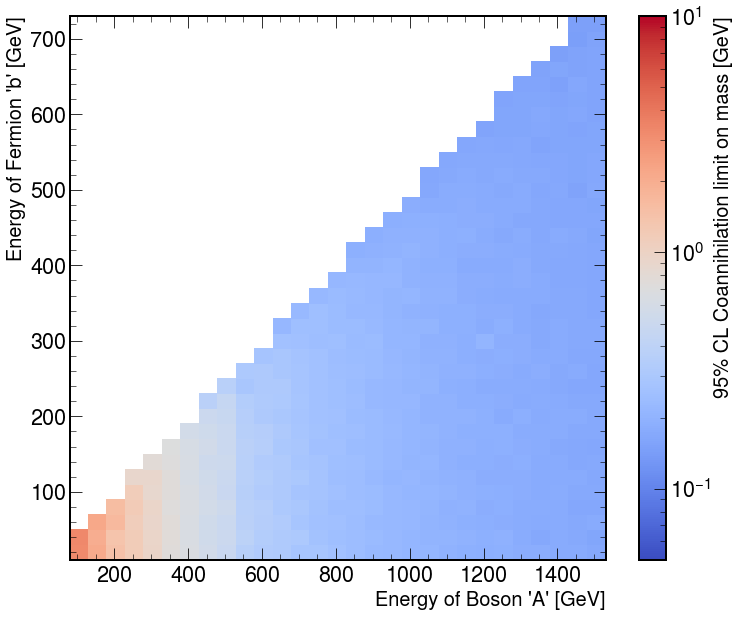

In [19]:
heat = pd.read_csv('heat.csv')
df = heat.pivot('dy','dx','lim')
print(df.index)
plt.pcolor(df.columns,df.index,df,cmap='coolwarm',norm=LogNorm(vmin=0.05, vmax=10))
cl = plt.colorbar()
cl.set_label("95% CL Coannihilation limit on mass [GeV]",fontsize=20)
plt.xlabel("Energy of Boson 'A' [GeV]", fontsize=20)
plt.ylabel("Energy of Fermion 'b' [GeV]", fontsize=20)
plt.show()